## _*Variational Quantum Classifier*_

The QSVM notebook demonstrates a kernel based approach. 
**This notebook shows the variational quantum classifier method.**

In [1]:
pip install qiskit[all]

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
import qiskit.aqua

In [6]:
from qiskit.aqua.components.optimizers import SPSA
from qiskit.ml.datasets import breast_cancer
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

First we prepare the dataset, which is used for training, testing and the finally prediction.

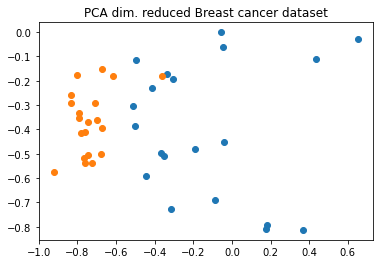

{'A': 0, 'B': 1}


In [7]:
dim = 2 # dimension of each data point
train_size = 20
test_size = 10
seed = 10598
shots = 1024

total, train, test, labels = breast_cancer(
    training_size=train_size, 
    test_size=test_size, 
    n=dim,
    plot_data=True
)
data_points, classtolabel = split_dataset_to_data_and_labels(test)
print(classtolabel)

In [8]:
classtolabel

{'A': 0, 'B': 1}

In [9]:
data_points

[array([[-0.10389794,  0.17924751],
        [-0.53086407, -0.4573074 ],
        [-0.21040012, -0.42492679],
        [-0.02115007, -0.46893251],
        [-0.20818445, -0.4872755 ],
        [ 0.15707835, -0.47624366],
        [ 0.11627517,  0.72088055],
        [-0.06843964, -0.52360461],
        [-0.54432956, -0.51392144],
        [-0.31034166, -0.53951   ],
        [-0.82652554, -0.4336021 ],
        [-0.73291597, -0.5064755 ],
        [-0.90409716, -0.00762145],
        [-0.7863327 , -0.3957758 ],
        [-0.53303533, -0.39673394],
        [-0.60479708, -0.25758478],
        [-0.50575853, -0.16951788],
        [-0.97372645, -0.29405715],
        [-0.65826859, -0.51310153],
        [-0.78114482, -0.31921948]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

We construct the vqc instance directly from the classes. 

Create the vqc in the programmatic approach.
- Optimizer instance is built  by instantiating the class SPSA.
- Feature map instance is buillt by instantiating the class ZZFeatureMap.
- Variational form instance is built by instantiating the class TwoLocal.
- Vqc instance is built by instantiating the class VQC. 


In [10]:
backend = BasicAer.get_backend('qasm_simulator')

#optimizes the hyperplane
optimizer = SPSA(max_trials=100, c0=4.0, skip_calibration=True)
optimizer.set_options(save_steps=1)

#Data Embedding
feature_map = ZZFeatureMap(feature_dimension=dim, reps=2)

variational_form = TwoLocal(dim, ['ry', 'rz'], 'cz', reps=3)

vqc = VQC(optimizer, feature_map, variational_form, train, test)

quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=seed,
                                   seed_transpiler=seed)

Now we run it.

In [11]:
result = vqc.run(quantum_instance)
print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  0.7


The programmatic approach allows the users to invoke APIs upon the vqc instance directly. In the following, we invoke the API "predict" upon the trained vqc instance to predict the labels for the newly provided data input.

Use the trained model to evaluate data directly, and we store a label_to_class and class_to_label for helping converting between label and class name

In [10]:
# Datapoints of the predicted 
predicted_probability, predicted_labels = vqc.predict(data_points[0])
predicted_classes = map_label_to_class_name(predicted_labels, vqc.label_to_class)
print("prediction:   {}".format(predicted_labels))

prediction:   [0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1]


In [11]:
predicted_probability

array([[0.99023438, 0.00976562],
       [0.39746094, 0.60253906],
       [0.72167969, 0.27832031],
       [0.79394531, 0.20605469],
       [0.75292969, 0.24707031],
       [0.54003906, 0.45996094],
       [0.40039062, 0.59960938],
       [0.82519531, 0.17480469],
       [0.31640625, 0.68359375],
       [0.63378906, 0.36621094],
       [0.18847656, 0.81152344],
       [0.22753906, 0.77246094],
       [0.28027344, 0.71972656],
       [0.17285156, 0.82714844],
       [0.4765625 , 0.5234375 ],
       [0.51171875, 0.48828125],
       [0.53027344, 0.46972656],
       [0.13085938, 0.86914062],
       [0.22851562, 0.77148438],
       [0.19921875, 0.80078125]])

In [12]:
data_points

[array([[-0.10389794,  0.17924751],
        [-0.53086407, -0.4573074 ],
        [-0.21040012, -0.42492679],
        [-0.02115007, -0.46893251],
        [-0.20818445, -0.4872755 ],
        [ 0.15707835, -0.47624366],
        [ 0.11627517,  0.72088055],
        [-0.06843964, -0.52360461],
        [-0.54432956, -0.51392144],
        [-0.31034166, -0.53951   ],
        [-0.82652554, -0.4336021 ],
        [-0.73291597, -0.5064755 ],
        [-0.90409716, -0.00762145],
        [-0.7863327 , -0.3957758 ],
        [-0.53303533, -0.39673394],
        [-0.60479708, -0.25758478],
        [-0.50575853, -0.16951788],
        [-0.97372645, -0.29405715],
        [-0.65826859, -0.51310153],
        [-0.78114482, -0.31921948]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]